**PREDIÇÃO DA VIDA ÚTIL E CONDIÇÃO DE PNEUS COM MACHINE LEARNING**

**Este projeto tem como objetivo desenvolver um modelo preditivo robusto para estimar a vida útil restante (RUL) de pneus automotivos com base em variáveis operacionais, características dos veículos e condições ambientais. Utilizando algoritmos de aprendizado de máquina e um conjunto de dados sintético realista com mais de 900 mil amostras, a solução proposta visa antecipar o momento ideal para substituição dos pneus, promovendo manutenção preditiva, segurança veicular e otimização de custos.**

**A proposta se alinha com práticas avançadas de manutenção preditiva (PdM) e gestão de ativos automotivos, sendo altamente aplicável a frotas, sistemas embarcados, plataformas de telemetria e indústria automotiva em geral.**

In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
# Carregando a base de dados
df = pd.read_csv('/content/Synthetic Automobile Tyre RUL Data.csv')

In [3]:
# Observando
df.head()

,vehicle_model,fuel_type,transmission_type,maximum_power(hp),maximum_torque(N/m),maximum_speed (km/h),steering_radius(m),vehicle_acceleration(0-100 km/h in seconds),vehicle_mileage(mpg),vehicle_sprung_mass(kg),...,tyre_age(years),number_of_punctures,current_tread_depth(mm),road_condition,weather_condition,axle_type(driven/dead),expected_tyre_life(km),retreaded,kilometers_driven(km),remaining_useful_life(km)
0,Mazda CX-5,petrol,manual,140,320,200,5.6,3.3,26,1650,...,1,4,5.94,smooth,Tropical and humid,dead,60000,no,7500,32931
1,BMW 3 Series,petrol,automatic,190,400,250,5.6,5.0,30,1575,...,5,11,1.56,smooth,Mild with distinct seasons,drive,80000,no,57143,15819
2,Hyundai Elantra,diesel,manual,110,265,205,5.4,3.1,33,1350,...,2,3,6.04,smooth,Tropical and humid,drive,95000,no,13571,66767
3,Tesla Model S,electric,automatic,500,854,322,5.8,11.6,396,2241,...,3,3,3.64,offroad,Cold,drive,50000,no,21429,19837
4,Subaru Outback,petrol,manual,194,376,210,5.4,3.7,26,1600,...,7,7,1.73,rough,Mixed conditions,dead,80000,no,43077,10198


In [4]:
df.tail()

,vehicle_model,fuel_type,transmission_type,maximum_power(hp),maximum_torque(N/m),maximum_speed (km/h),steering_radius(m),vehicle_acceleration(0-100 km/h in seconds),vehicle_mileage(mpg),vehicle_sprung_mass(kg),...,tyre_age(years),number_of_punctures,current_tread_depth(mm),road_condition,weather_condition,axle_type(driven/dead),expected_tyre_life(km),retreaded,kilometers_driven(km),remaining_useful_life(km)
968138,Kia Sorento,diesel,automatic,206,421,210,5.5,3.8,24,1800,...,4,1,3.45,smooth,Mixed conditions,drive,65000,no,28889,20188
968139,Chevrolet Silverado,petrol,manual,313,519,180,6.5,4.3,20,2200,...,6,10,8.30,offroad,Mixed conditions,drive,80000,no,32000,37678
968140,BMW i4,electric,automatic,250,430,190,5.7,6.9,300,2200,...,7,7,2.23,offroad,Cold,dead,70000,no,40833,11911
968141,BMW i4,electric,automatic,250,430,190,5.7,6.9,300,2200,...,7,2,3.72,smooth,Mixed conditions,drive,70000,no,37692,24646
968142,Nissan Leaf,electric,automatic,110,320,144,5.4,3.5,226,1540,...,7,6,2.61,offroad,Sunny and dry,drive,110000,yes,55000,22875


In [5]:
# Observando linhas e colunas
df.shape

(968143, 31)

In [6]:
# Informações sobre os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968143 entries, 0 to 968142
Data columns (total 31 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   vehicle_model                                968143 non-null  object 
 1   fuel_type                                    968143 non-null  object 
 2   transmission_type                            968143 non-null  object 
 3   maximum_power(hp)                            968143 non-null  int64  
 4   maximum_torque(N/m)                          968143 non-null  int64  
 5   maximum_speed (km/h)                         968143 non-null  int64  
 6   steering_radius(m)                           968143 non-null  float64
 7   vehicle_acceleration(0-100 km/h in seconds)  968143 non-null  float64
 8   vehicle_mileage(mpg)                         968143 non-null  int64  
 9   vehicle_sprung_mass(kg)                      968143 non-nul

In [7]:
# Dados estatísticos
df.describe()

,maximum_power(hp),maximum_torque(N/m),maximum_speed (km/h),steering_radius(m),vehicle_acceleration(0-100 km/h in seconds),vehicle_mileage(mpg),vehicle_sprung_mass(kg),tyre_camber_angle(degree),Standard_tread_depth(mm),tread_wear_rating (UTQG),average_tread_temperature(celsius),recommended_inflation_pressure(psi),average_inflation_pressure(psi),tyre_age(years),number_of_punctures,current_tread_depth(mm),expected_tyre_life(km),kilometers_driven(km),remaining_useful_life(km)
count,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000,968143.000000
mean,232.750341,466.951606,210.542438,5.652183,5.387614,132.702085,1780.315811,-1.027631,7.906671,489.754592,13.168335,37.393398,29.510390,3.909228,5.501899,4.610657,82276.497377,30335.490382,37802.654587
std,108.524800,217.964262,36.478546,0.243318,2.181373,132.734531,340.881489,0.201279,1.787928,118.062264,12.011927,5.724938,8.983076,1.965391,3.450840,2.129216,15690.620781,17938.310958,17797.765351
min,110.000000,240.000000,144.000000,5.400000,3.100000,19.000000,1300.000000,-1.500000,6.350000,220.000000,-10.000000,32.000000,12.000000,1.000000,0.000000,0.000000,50000.000000,3333.000000,0.000000
25%,150.000000,320.000000,185.000000,5.500000,3.700000,26.000000,1575.000000,-1.000000,7.140000,480.000000,10.000000,35.000000,22.260000,2.000000,3.000000,3.160000,70000.000000,15833.000000,24662.000000
50%,206.000000,400.000000,210.000000,5.600000,4.800000,32.000000,1650.000000,-1.000000,7.140000,500.000000,15.000000,35.000000,29.380000,4.000000,5.000000,4.570000,80000.000000,27778.000000,37062.000000
75%,292.000000,556.000000,233.000000,5.800000,6.600000,267.000000,1850.000000,-1.000000,7.940000,600.000000,22.000000,36.000000,35.470000,6.000000,9.000000,5.890000,90000.000000,42000.000000,50456.000000
max,522.000000,1231.000000,322.000000,6.500000,11.600000,396.000000,2600.000000,-0.500000,14.290000,640.000000,30.000000,51.000000,55.000000,7.000000,11.000000,13.340000,110000.000000,110000.000000,96752.000000


In [8]:
# Verificando a existência de valores nulos
df.isnull().sum()

,0
vehicle_model,0
fuel_type,0
transmission_type,0
maximum_power(hp),0
maximum_torque(N/m),0
maximum_speed (km/h),0
steering_radius(m),0
vehicle_acceleration(0-100 km/h in seconds),0
vehicle_mileage(mpg),0
vehicle_sprung_mass(kg),0


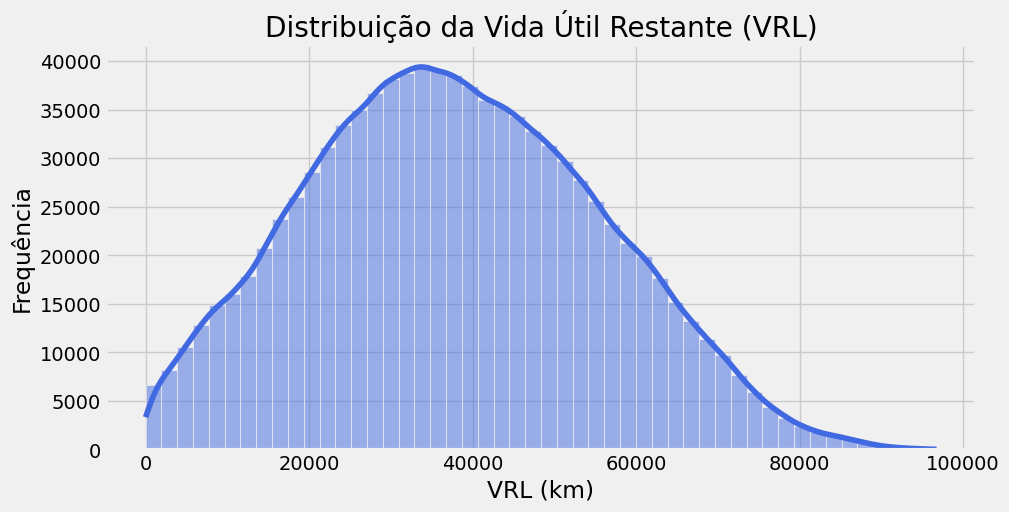

In [9]:
# Histograma do RUL
sns.histplot(df['remaining_useful_life(km)'], bins=50, kde=True, color='royalblue')
plt.title('Distribuição da Vida Útil Restante (VRL)')
plt.xlabel('VRL (km)')
plt.ylabel('Frequência')
plt.show()

**O gráfico acima apresenta a distribuição da Vida Útil Restante (RUL) dos pneus em quilômetros, variável-alvo central deste projeto. A maioria dos registros concentra-se entre 20.000 km e 50.000 km, com um pico próximo de 35.000 km, indicando que grande parte dos pneus analisados ainda se encontra em uso intermediário. Observa-se também uma cauda à direita, com pneus de alta durabilidade (acima de 70.000 km), e uma cauda à esquerda, indicando casos críticos próximos do fim da vida útil.**

**Essa distribuição revela uma variabilidade operacional significativa, provavelmente influenciada por fatores como tipo de estrada, pressão dos pneus, condições climáticas e histórico de manutenção. Entender esse comportamento é essencial para calibrar corretamente os modelos preditivos e selecionar as métricas de avaliação mais apropriadas, como RMSE e MAE, além de identificar possíveis necessidades de transformação ou segmentação do target durante a modelagem.**

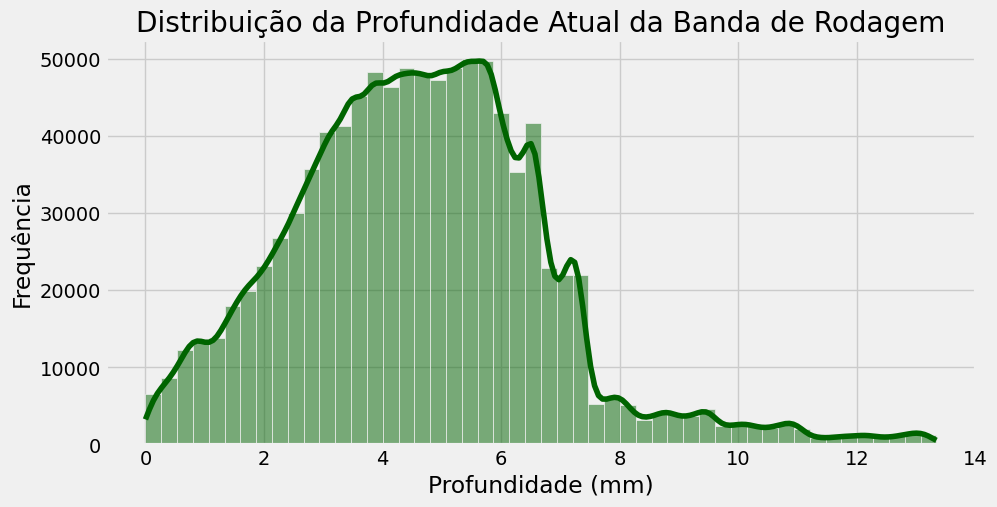

In [10]:
# Histograma da profundidade atual
sns.histplot(df['current_tread_depth(mm)'], bins=50, kde=True, color='darkgreen')
plt.title('Distribuição da Profundidade Atual da Banda de Rodagem')
plt.xlabel('Profundidade (mm)')
plt.ylabel('Frequência')
plt.show()

**O gráfico acima ilustra a distribuição da profundidade atual da banda de rodagem dos pneus, medida em milímetros. Notamos que a maioria dos pneus encontra-se com profundidade entre 3 mm e 6 mm, indicando que estão em fase intermediária de desgaste, embora ainda operacionais. Existe uma queda abrupta a partir de 6 mm, refletindo o número relativamente menor de pneus novos ou pouco utilizados, e um aumento gradual a partir de 2 mm, evidenciando um volume crescente de pneus se aproximando do limite mínimo de segurança.**

**Esse comportamento é coerente com o ciclo de vida natural dos pneus e reforça a importância da variável como indicador secundário da condição atual, podendo ser utilizada de forma conjunta ou auxiliar na previsão do RUL. Em aplicações reais, profundidades abaixo de 1,6 mm são consideradas críticas, o que sugere a possibilidade de utilizar thresholds operacionais para alertas preventivos.**

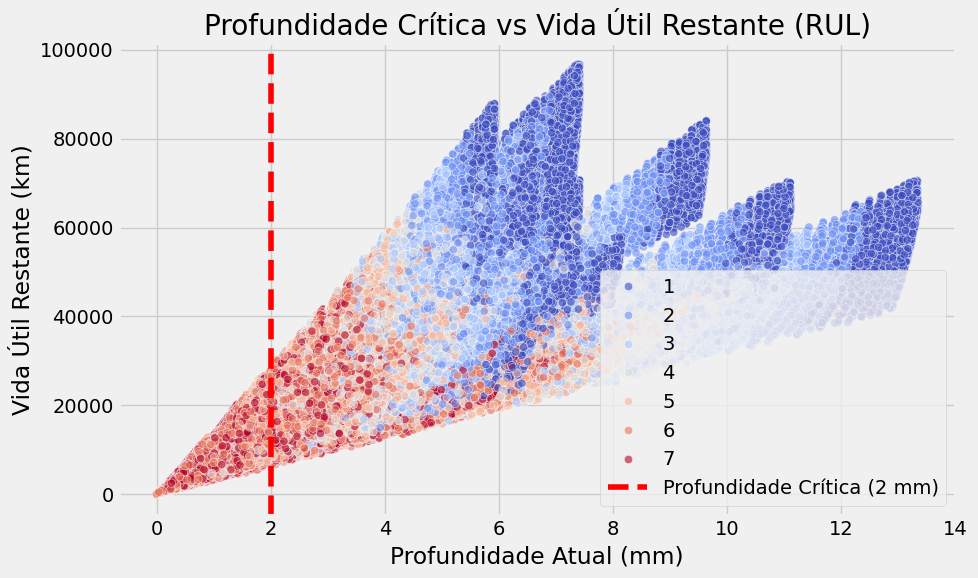

In [11]:
# Profundidade crítica VS RUL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='current_tread_depth(mm)', y='remaining_useful_life(km)', hue='tyre_age(years)', palette='coolwarm', alpha=0.6)
plt.axvline(x=2, color='red', linestyle='--', label='Profundidade Crítica (2 mm)')
plt.title('Profundidade Crítica vs Vida Útil Restante (RUL)')
plt.xlabel('Profundidade Atual (mm)')
plt.ylabel('Vida Útil Restante (km)')
plt.legend()
plt.tight_layout()
plt.show()

**O gráfico acima analisa a relação entre a profundidade atual da banda de rodagem (em mm) e a vida útil restante (RUL) dos pneus, destacando também a idade do pneu por coloração. A linha vermelha marca o limite crítico de 2 mm, considerado o ponto de segurança mínima para operação. Observa-se que a maioria dos pneus com profundidade abaixo de 2 mm apresenta baixo RUL, como esperado. No entanto, há casos pontuais com profundidade crítica e alto RUL, o que pode indicar:**

**- inconsistências nos dados ou na previsão da VRL;**

**-condições operacionais extremas;**

**-recauchutagem recente;**

**-ou simplesmente pneus antigos (em vermelho escuro) que permanecem em uso sem a devida substituição.**

**Esse tipo de insight é fundamental em ambientes onde a decisão de troca preventiva baseada apenas na previsão de RUL pode não ser suficiente. A profundidade deve ser usada como variável de segurança crítica, complementando a predição.**

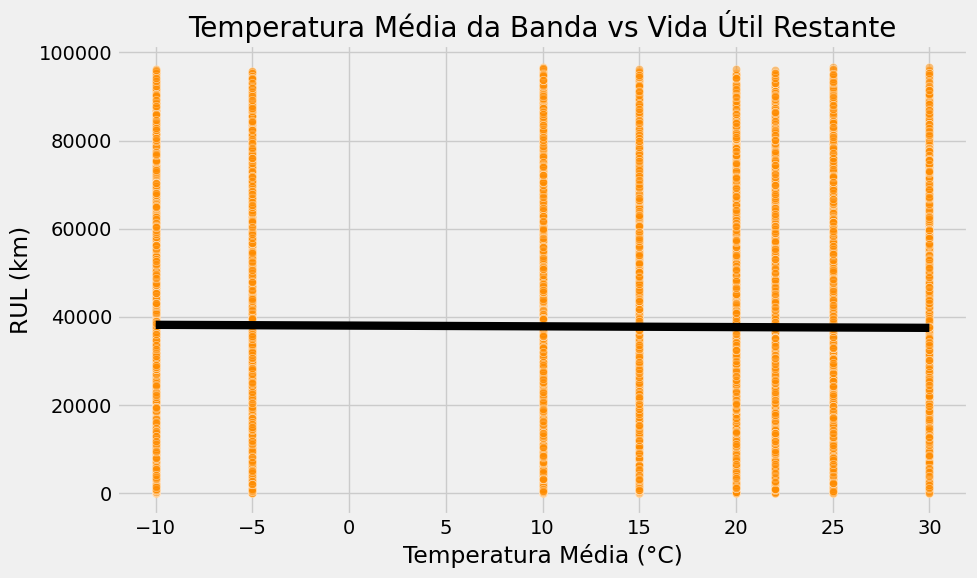

In [12]:
# Temperatura média VS RUL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_tread_temperature(celsius)', y='remaining_useful_life(km)', alpha=0.5, color='darkorange')
sns.regplot(data=df, x='average_tread_temperature(celsius)', y='remaining_useful_life(km)', scatter=False, color='black')
plt.title('Temperatura Média da Banda vs Vida Útil Restante')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('RUL (km)')
plt.tight_layout()
plt.show()

**O gráfico acima explora a relação entre a temperatura média da banda de rodagem dos pneus e a vida útil restante (RUL). A expectativa técnica é que temperaturas mais elevadas contribuam para maior desgaste, reduzindo o RUL. No entanto, o comportamento observado é curioso, pois o RUL mantém-se relativamente constante ao longo de diferentes faixas de temperatura, e a dispersão dos pontos está organizada em faixas discretas de temperatura, sugerindo possíveis valores fixos (categorias disfarçadas de contínuo). É uma característica que comprova que os dados são sintéticos.**

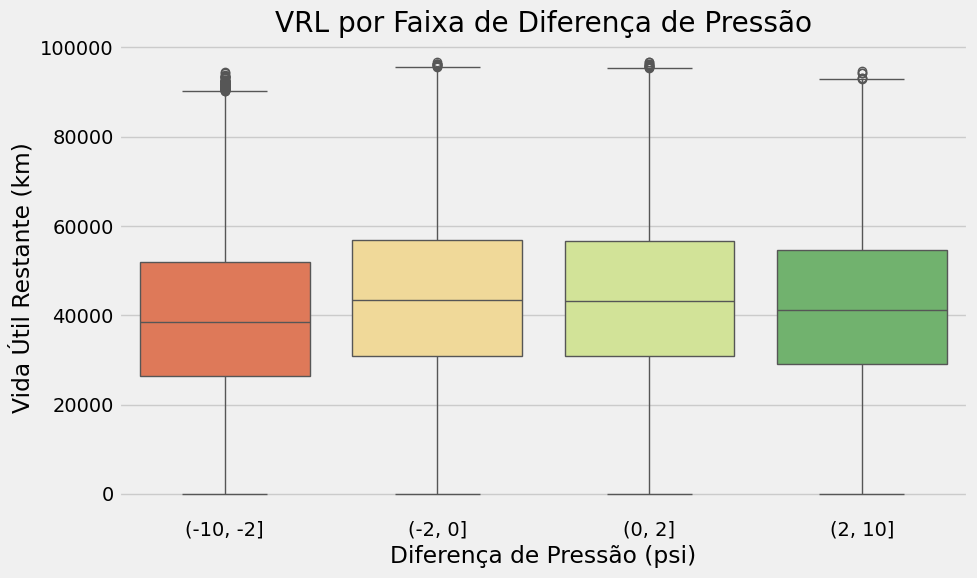

In [13]:
# Diferença de pressão VS RUL
df['pressure_diff'] = df['average_inflation_pressure(psi)'] - df['recommended_inflation_pressure(psi)']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=pd.cut(df['pressure_diff'], bins=[-10, -2, 0, 2, 10]), y='remaining_useful_life(km)', palette='RdYlGn')
plt.title('VRL por Faixa de Diferença de Pressão')
plt.xlabel('Diferença de Pressão (psi)')
plt.ylabel('Vida Útil Restante (km)')
plt.tight_layout()
plt.show()

**O gráfico acima mostra a relação entre a diferença de pressão (pressão real menos a pressão recomendada) e a vida útil restante (RUL) dos pneus. As faixas foram agrupadas para melhor leitura: desde pneus significativamente subinflados (<-2 psi) até levemente sobreinflados (>2 psi).**

**Observamos uma tendência clara: pneus que operam abaixo da pressão recomendada (<-2 psi) apresentam menor mediana de RUL e maior variabilidade. À medida que a pressão se aproxima da ideal, o RUL tende a aumentar e estabilizar, indicando que a manutenção adequada da pressão é determinante para a durabilidade dos pneus.**

**Esse insight reforça a importância de:**

**Monitoramento contínuo da pressão dos pneus (via sensores TPMS ou sistemas de bordo);**

**Aplicações práticas em sistemas preditivos para geração de alertas quando a pressão estiver fora da faixa ótima.**

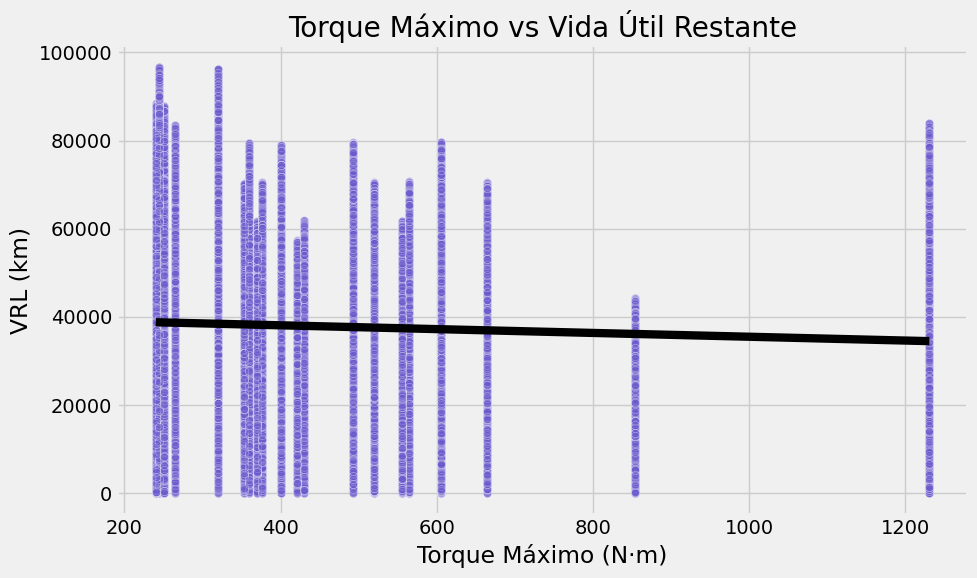

In [14]:
# Torque vs RUL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='maximum_torque(N/m)', y='remaining_useful_life(km)', alpha=0.4, color='slateblue')
sns.regplot(data=df, x='maximum_torque(N/m)', y='remaining_useful_life(km)', scatter=False, color='black')
plt.title('Torque Máximo vs Vida Útil Restante')
plt.xlabel('Torque Máximo (N·m)')
plt.ylabel('VRL (km)')
plt.tight_layout()
plt.show()

**Acima o gráfico investiga a relação entre o torque máximo (N·m) do veículo e a vida útil restante (RUL) dos pneus. A expectativa técnica é que veículos com maior torque apliquem maiores esforços nos pneus durante aceleração, frenagens e curvas, assim acelerando o desgaste.**

**A tendência negativa evidenciada pela regressão (linha preta) confirma esse comportamento, pois à medida que o torque aumenta, o RUL tende a diminuir. Ainda que o declínio não seja abrupto, ele indica que veículos mais potentes impõem maior carga dinâmica nos pneus, o que, ao longo do tempo, reduz sua durabilidade.**

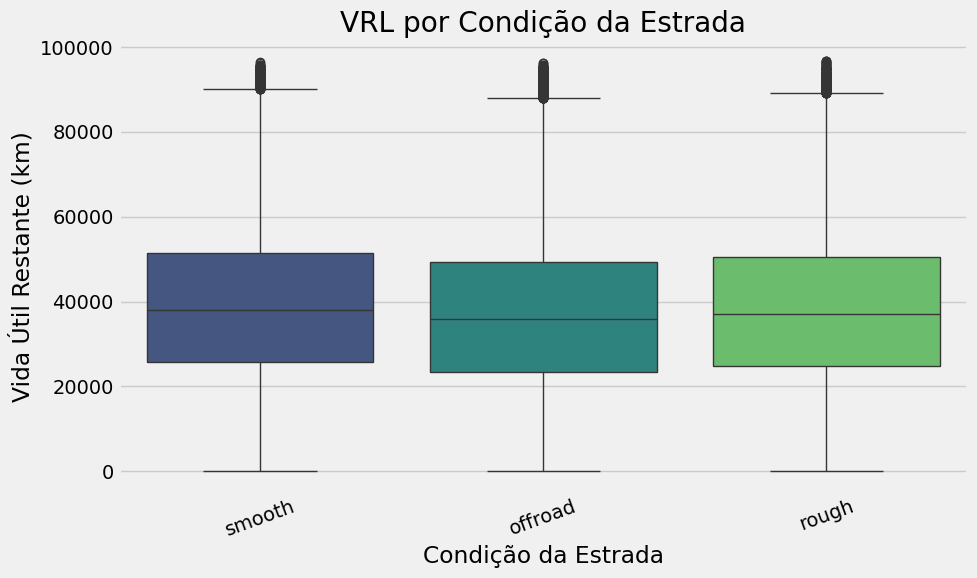

In [15]:
# Condição de estrada vs RUL
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='road_condition', y='remaining_useful_life(km)', palette='viridis')
plt.title('VRL por Condição da Estrada')
plt.xlabel('Condição da Estrada')
plt.ylabel('Vida Útil Restante (km)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

**Acima o gráfico compara a vida útil restante (RUL) dos pneus de acordo com a condição predominante da estrada onde o veículo opera: smooth (lisa), rough (irregular) e offroad (estrada de chão). A distribuição mostra que veículos que trafegam majoritariamente em estradas lisas tendem a preservar melhor a durabilidade dos pneus, apresentando mediana do RUL ligeiramente superior em comparação às demais condições. Por outro lado, estradas de chão e irregulares estão associadas a maior desgaste e menor vida útil, ainda que com alta dispersão dos dados.**

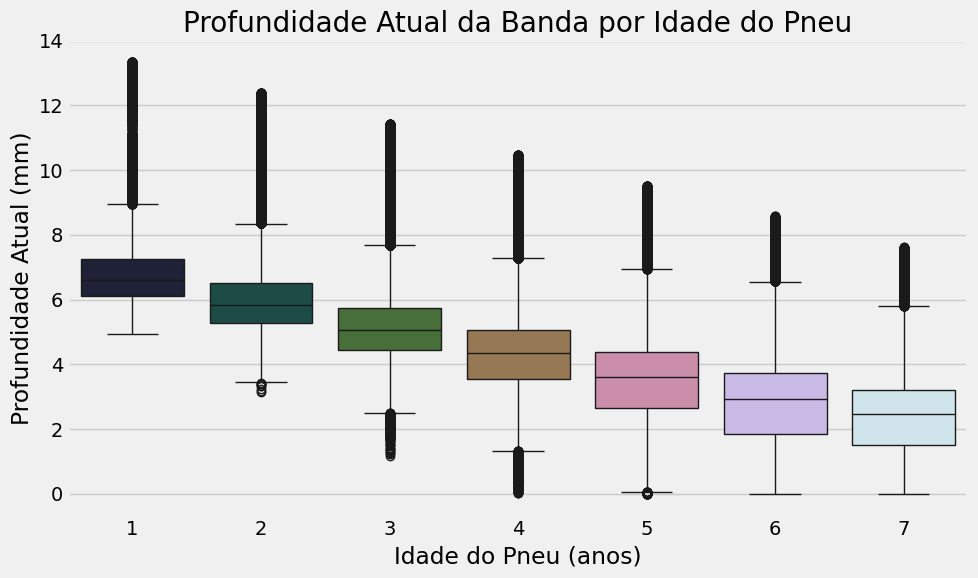

In [16]:
# Idade do pneu vs profundidade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tyre_age(years)', y='current_tread_depth(mm)', palette='cubehelix')
plt.title('Profundidade Atual da Banda por Idade do Pneu')
plt.xlabel('Idade do Pneu (anos)')
plt.ylabel('Profundidade Atual (mm)')
plt.tight_layout()
plt.show()

**O gráfico acima mostra a relação entre a idade dos pneus (em anos) e a profundidade atual da banda de rodagem (em mm). Observa-se uma tendência clara e consistente: quanto mais antigo o pneu, menor tende a ser sua profundidade residual.**

**A mediana da profundidade apresenta declínio quase linear com o tempo, evidenciando o processo de desgaste gradual ao longo da vida útil. Além disso, a variabilidade dos valores aumenta em pneus mais antigos, o que pode refletir diferenças no uso, manutenção e condições operacionais.**

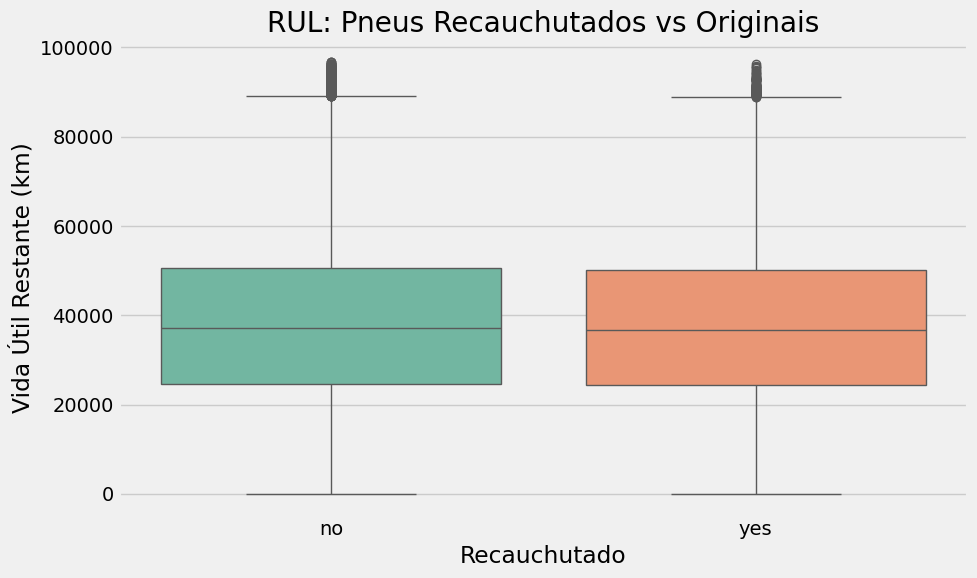

In [17]:
# Recauchutados vs originais
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='retreaded', y='remaining_useful_life(km)', palette='Set2')
plt.title('RUL: Pneus Recauchutados vs Originais')
plt.xlabel('Recauchutado')
plt.ylabel('Vida Útil Restante (km)')
plt.tight_layout()
plt.show()


**O boxplot acima compara a vida útil restante (RUL) entre pneus originais e pneus recauchutados. De forma interessante, observa-se que ambos os grupos apresentam distribuições semelhantes, com medianas próximas e faixas interquartis quase equivalentes. Essa similaridade sugere que os pneus recauchutados, quando bem executados, podem manter um desempenho de durabilidade comparável ao de pneus novos. Embora a variabilidade seja ligeiramente maior nos recauchutados (provável reflexo de diferentes métodos e qualidade de reforma), os dados reforçam a viabilidade técnica e econômica da recauchutagem em operações industriais ou frotas comerciais.**

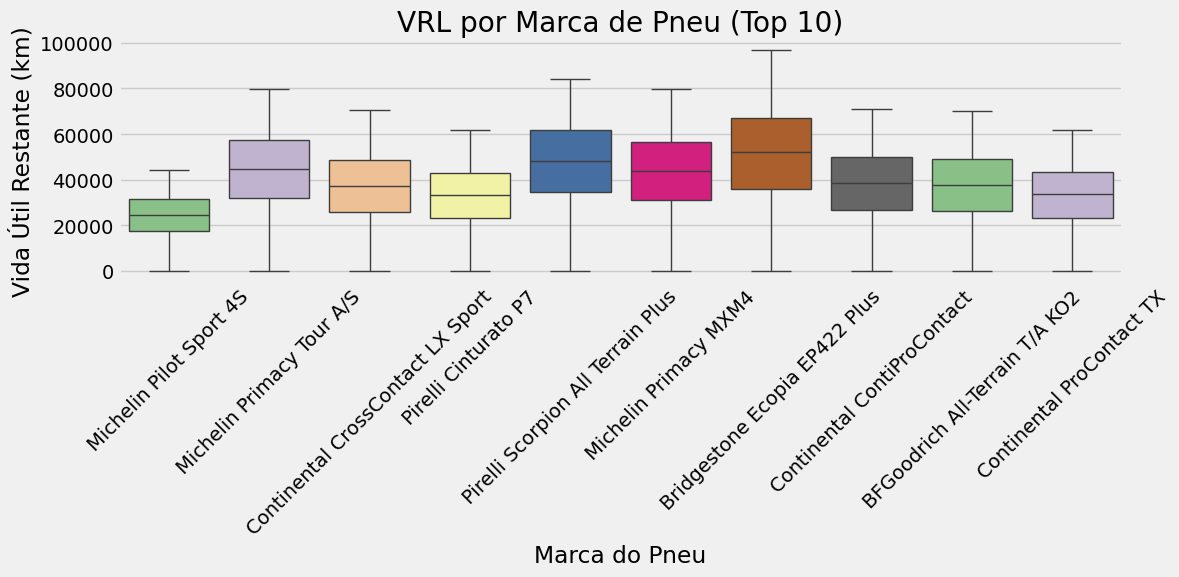

In [18]:
# Marcas de pneu com maior VRL

top_brands = df['tyre_brand'].value_counts().nlargest(10).index
df_top = df[df['tyre_brand'].isin(top_brands)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='tyre_brand', y='remaining_useful_life(km)', palette='Accent')
plt.title('VRL por Marca de Pneu (Top 10)')
plt.xlabel('Marca do Pneu')
plt.ylabel('Vida Útil Restante (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Este gráfico apresenta a distribuição do RUL para as 10 marcas de pneus mais representadas no conjunto de dados. Optou-se pelo uso de boxplots em vez de médias simples para evidenciar a dispersão e a variabilidade interna de cada marca, o que é essencial para análises confiáveis de durabilidade.**

**Notamos que algumas marcas como Bridgestone Ecopia EP422 Plus e Pirelli Scorpion All Terrain Plus apresentam distribuições mais elevadas, com mediana de RUL acima de 50.000 km e baixa concentração de outliers negativos, indicando maior previsibilidade e desempenho consistente. Já marcas como Michelin Pilot Sport 4s e Continental ProContact TX apresentam menor RUL mediana, além de ampla dispersão dos dados.**

**Essas diferenças de desempenho podem apoiar decisões de compra, contratos com fornecedores ou estratégia de substituição de pneus em frotas.**

**Para enriquecer a análise e capturar comportamentos operacionais mais representativos, vamos criar a variável derivada 'pressure_diff', que representa a diferença entre a pressão média de inflação real do pneu e a pressão recomendada pelo fabricante. Essa nova feature tem como objetivo indicar o nível de desvio da condição ideal de operação do pneu. Enquanto os valores originais fornecem informações absolutas, a 'pressure_diff' vai trazer uma visão comparativa direta entre o que seria o ideal e o que realmente ocorre em campo.**

**pressure_diff < 0:** pneu operando abaixo da pressão recomendada (subinflado);

**pressure_diff ≈ 0:** pressão próxima do ideal;

**pressure_diff > 0:** pneu operando acima da pressão recomendada (sobreinflado).

In [19]:
# Criando nova feature 'diferença de pressão'
df['pressure_diff'] = df['average_inflation_pressure(psi)'] - df['recommended_inflation_pressure(psi)']

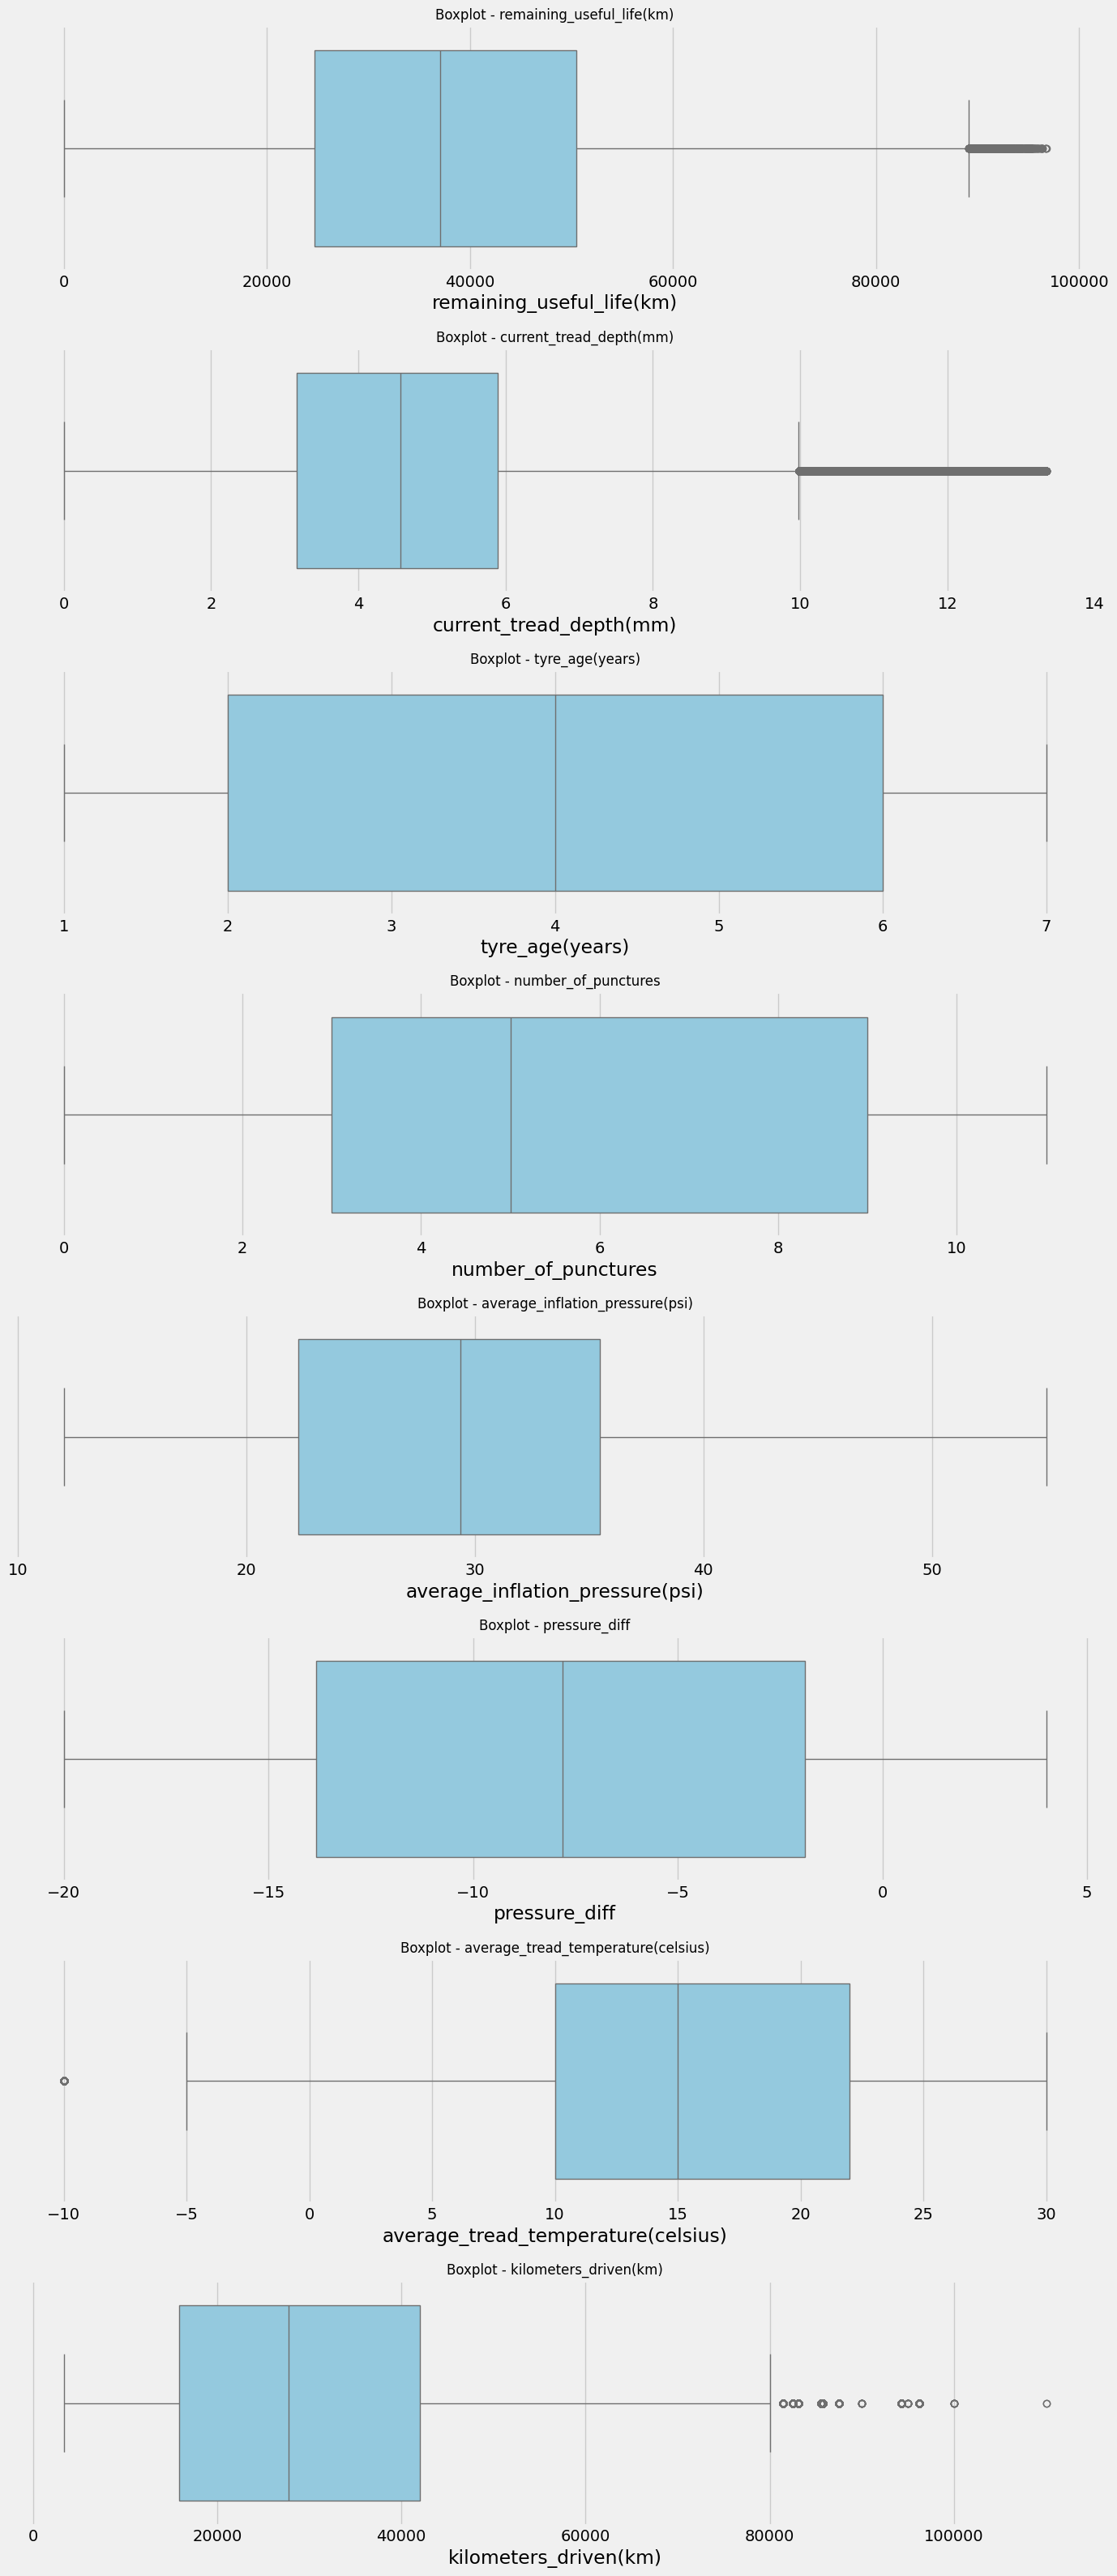

In [20]:
# Observando a existência de outliers
features = [
    'remaining_useful_life(km)',
    'current_tread_depth(mm)',
    'tyre_age(years)',
    'number_of_punctures',
    'average_inflation_pressure(psi)',
    'pressure_diff',
    'average_tread_temperature(celsius)',
    'kilometers_driven(km)'
]

plt.figure(figsize=(14, len(features) * 4))
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot - {col}', fontsize=12)
    plt.tight_layout()

plt.show()


**Os gráficos acima mostram os boxplots de variáveis numéricas selecionadas do conjunto de dados. Essa etapa é essencial para identificar possíveis valores atípicos (outliers) que podem impactar negativamente os modelos de machine learning, afetando a média, a dispersão ou a interpretação das relações entre as variáveis.**

**remaining_useful_life(km):** apresenta uma cauda longa à direita, com valores acima de 80.000 km que podem ser considerados outliers, dependendo do contexto operacional.

**current_tread_depth(mm):** há valores superiores a 10 mm, que estão acima do padrão da maioria dos pneus novos — pode indicar erros ou categorias de pneus especiais.

**tyre_age(years):** distribuição controlada de 1 a 7 anos, sem presença significativa de outliers.

**number_of_punctures:** bem comportada, mas com alguns valores extremos (10+) que merecem atenção. Dependendo da aplicação, pode indicar uso severo ou falha no histórico de manutenção.

**average_inflation_pressure(psi):** majoritariamente concentrada entre 20 e 40 psi, com alguns valores acima de 50 psi que podem ser excessivos para pneus comuns.

**pressure_diff:** distribuída principalmente em torno de -10 a 0 psi, reforçando a presença significativa de pneus subinflados. O excesso de valores negativos pode justificar uma segmentação ou transformação futura.

**average_tread_temperature(celsius):** a maior parte das amostras concentra-se entre 5°C e 25°C, com poucos valores extremos negativos — o que pode indicar problemas de medição ou ruído na simulação.

**kilometers_driven(km):** distribuição levemente assimétrica, com alguns pneus superando os 90.000 km — o que merece ser cruzado com profundidade e VRL para avaliar se são válidos ou inconsistentes.

**Embora o boxplot identifique valores atípicos em variáveis como profundidade, RUL e pressão, esses registros serão mantidos,, pois em aplicações reais de manutenção preditiva, outliers frequentemente representam condições operacionais críticas ou comportamentos de risco. Portanto, ao invés de removê-los, optamos por preservar a diversidade de cenários reforçando a robustez e a capacidade do modelo de atuar em contextos extremos e de alto impacto operacional.**

In [21]:
# Copia o dataframe original
df_model = df.copy()

# Colunas para remover
colunas_excluir = [
    'vehicle_model',
    'tyre_brand',
    'tyre_size',
    'tread_material',
    'tread_pattern',
    'country',
    'retreaded',
    'axle_type(driven/dead)',
    'recommended_inflation_pressure(psi)'
]

df_model.drop(columns=colunas_excluir, inplace=True)



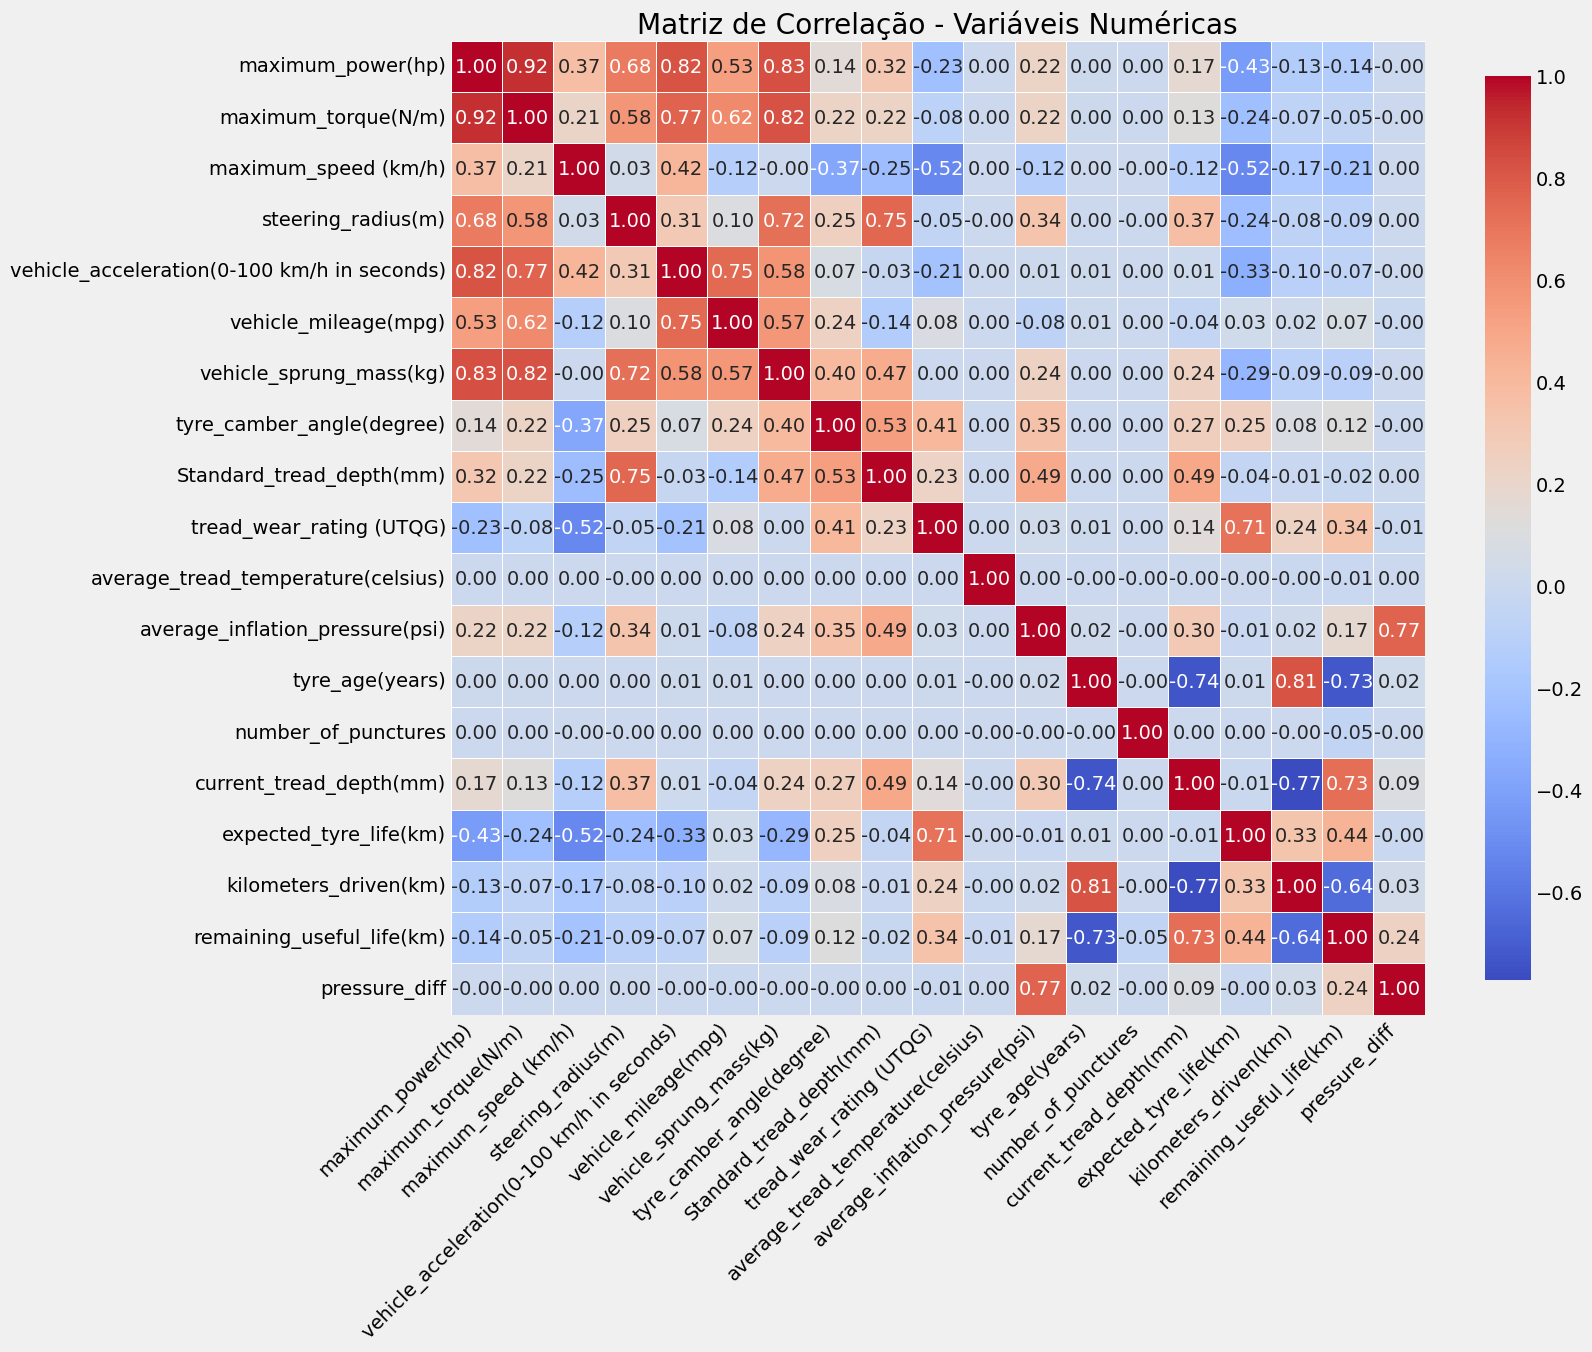

In [22]:
# Selecionando apenas colunas numéricas
df_corr = df_model.select_dtypes(include='number')

# Calcular correlação de Pearson
corr_matrix = df_corr.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**O gráfico acima apresenta a correlação de Pearson entre as principais variáveis numéricas do conjunto de dados. O objetivo é identificar relações lineares fortes que possam indicar: Variáveis relevantes para prever o RUL, redundância entre colunas e possíveis interações não lineares a explorar.**

**Embora 'maximum_power' e 'maximum_torque' sejam altamente correlacionadas, opta-se por manter apenas o torque na modelagem, pois é a variável com maior relevância física no processo de desgaste dos pneus. Essa escolha evita multicolinearidade e mantém o foco técnico no fator mais diretamente responsável pelo esforço mecânico aplicado à banda de rodagem.**

In [23]:
# Excluindo a variável altamente correlacionada
df_model.drop(columns=[
    'expected_tyre_life(km)',
    'average_tread_temperature(celsius)',
    'kilometers_driven(km)',
    'Standard_tread_depth(mm)',
    'maximum_torque(N/m)',
    'vehicle_acceleration(0-100 km/h in seconds)',
    'steering_radius(m)',
    'vehicle_sprung_mass(kg)',
    'maximum_power(hp)',
    'maximum_speed (km/h)', 'current_tread_depth(mm)'
], inplace=True)


**Vamos converter as variáveis categóricas para numéricas. O uso de 0 e 1 via One-Hot Encoding garante que as variáveis categóricas sejam transformadas em um formato numérico, não ordinal e semanticamente neutro, respeitando a natureza qualitativa dos dados. É a abordagem mais segura e interpretável para regressão, classificação e modelos baseados em árvore.**

In [24]:
# Convertendo as colunas categóricas para numérica
df_model = pd.get_dummies(df_model, drop_first=True)

In [25]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968143 entries, 0 to 968142
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   vehicle_mileage(mpg)                          968143 non-null  int64  
 1   tyre_camber_angle(degree)                     968143 non-null  float64
 2   tread_wear_rating (UTQG)                      968143 non-null  int64  
 3   average_inflation_pressure(psi)               968143 non-null  float64
 4   tyre_age(years)                               968143 non-null  int64  
 5   number_of_punctures                           968143 non-null  int64  
 6   remaining_useful_life(km)                     968143 non-null  int64  
 7   pressure_diff                                 968143 non-null  float64
 8   fuel_type_electric                            968143 non-null  bool   
 9   fuel_type_petrol                              96

In [26]:
# Reduzindo o dataset para um processamento mais rápido.
df_model_1 = df_model.iloc[:300_000]

In [27]:
X = df_model_1.drop(columns=['remaining_useful_life(km)'])
y = df_model_1['remaining_useful_life(km)']

In [28]:
# Separando em treino/validação/teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
# Escalonando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [30]:
lgb = LGBMRegressor(n_estimators=100, max_depth=5, random_state=42)
lgb.fit(X_train_scaled, y_train)

# Previsões nos conjuntos de validação e teste
val_preds  = lgb.predict(X_val_scaled)
test_preds = lgb.predict(X_test_scaled)

# Avaliação - Validação
mae_val = mean_absolute_error(y_val, val_preds)
rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
r2_val = r2_score(y_val, val_preds)


print(" Avaliação - Validação")
print(f"MAE : {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R²  : {r2_val:.4f}")


# Avaliação - Teste
mae_test = mean_absolute_error(y_test, test_preds)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
r2_test = r2_score(y_test, test_preds)


print("\n Avaliação - Teste")
print(f"MAE : {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²  : {r2_test:.4f}")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 210000, number of used features: 16
[LightGBM] [Info] Start training from score 37857.845976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 Avaliação - Validação
MAE : 5455.15
RMSE: 7115.72
R²  : 0.8414

 Avaliação - Teste
MAE : 5425.48
RMSE: 7092.12
R²  : 0.8422


**MAE (Erro médio absoluto):** O modelo apresenta um erro médio absoluto de aproximadamente 5.455 km na validação e 5.425 km no teste, o que significa que, em média, a previsão da vida útil restante dos pneus difere da realidade por cerca de 5.4 mil quilômetros. Considerando que a RUL dos pneus pode variar de 30.000 a 80.000 km em cenários reais, esse erro representa uma margem razoável e prática. A pequena diferença entre os conjuntos confirma que o modelo generaliza bem e não sofre de overfitting.

**RMSE (Raiz do erro quadrático médio):** Com valores de 7.115 km na validação e 7.092 km no teste, o RMSE que penaliza mais os grandes erros está apenas levemente acima do MAE, indicando que erros extremos são raros. O modelo mantém uma boa estabilidade e está bem calibrado mesmo nos casos mais desafiadores.

**R²(Coeficiente de determinação):** Com um R² de 0.8414 na validação e 0.8422 no teste, o modelo consegue explicar cerca de 84% da variabilidade na vida útil restante dos pneus, o que demonstra um bom poder preditivo. Embora não atinja níveis superiores a 90%, o resultado é bastante sólido para um problema complexo e com variáveis parcialmente observáveis.



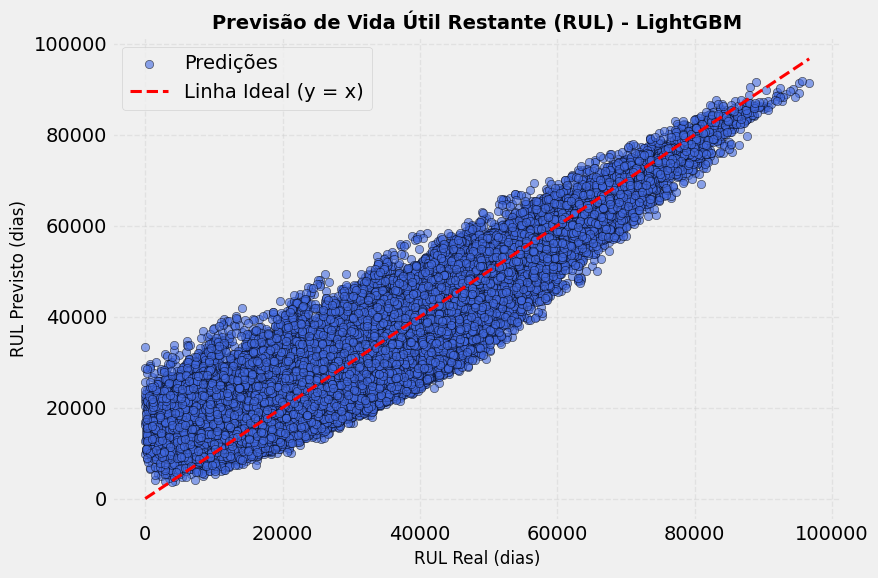

In [31]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue', edgecolor='k', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2.2, label='Linha Ideal (y = x)')
plt.xlabel("RUL Real (dias)", fontsize=12)
plt.ylabel("RUL Previsto (dias)", fontsize=12)
plt.title("Previsão de Vida Útil Restante (RUL) - LightGBM", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()



**Observa-se que a grande maioria dos pontos está próxima da linha ideal, o que indica que o modelo tem um bom grau de acerto ao estimar a vida útil dos pneus. Apesar de uma leve dispersão nas extremidades inferiores e superiores o que é comum em problemas de regressão com ampla variabilidade, o modelo demonstra consistência ao longo de toda a faixa de valores. A distribuição densa e linear dos pontos mostra que o modelo capturou bem a relação entre os fatores técnicos e operacionais dos pneus e sua durabilidade esperada. Isso corrobora os resultados quantitativos obtidos com as métricas MAE, RMSE e R², reforçando que o modelo está bem calibrado.**

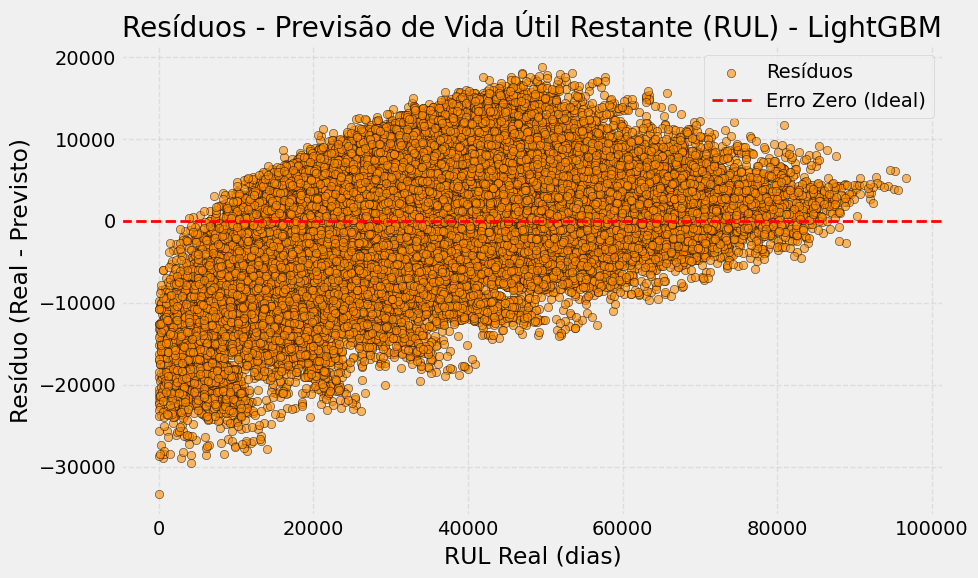

In [32]:
# Calculando os resíduos
residuos_lgbm = y_test - test_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos_lgbm, color='darkorange', alpha=0.6, edgecolor='k', label='Resíduos')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Erro Zero (Ideal)')
plt.xlabel("RUL Real (dias)")
plt.ylabel("Resíduo (Real - Previsto)")
plt.title("Resíduos - Previsão de Vida Útil Restante (RUL) - LightGBM")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**O gráfico acima mostra que os resíduos estão razoavelmente bem distribuídos ao redor da linha zero, embora exista uma leve tendência de superestimação (resíduos negativos) para valores baixos de RUL e uma subestimação (resíduos positivos) nas faixas intermediárias. Essa assimetria leve pode estar associada à variabilidade natural dos dados ou a limitações na representação de alguns padrões extremos. Ainda assim, a concentração densa de pontos próximos à linha zero, principalmente nas faixas centrais, evidencia que a maioria das previsões está próxima dos valores reais, com poucos erros sistemáticos relevantes. A dispersão é relativamente controlada, o que reforça que o modelo LightGBM é estável, apresenta boa generalização e consegue capturar a dinâmica de degradação dos pneus com competência.**



In [33]:
# Selecionando os 50 primeiros pneus
rul_real = y_test[:50]
rul_pred = test_preds[:50]

# Calculando o erro absoluto
erro_abs = np.abs(rul_real - rul_pred)

# Função para classificar erro
def erro_com_pontinho(erro):
    if erro <= 3000:
        return f"🟢 {int(erro)}"
    elif erro <= 8000:
        return f"🟡 {int(erro)}"
    else:
        return f"🔴 {int(erro)}"

# Função para classificar status do pneu
def classificar_status(rul_real):
    if rul_real >= 20000:
        return '🟢 Saudável'
    elif rul_real >= 10000:
        return '🟡 Moderado'
    else:
        return '🔴 Crítico'

# Montando o DataFrame
tabela = pd.DataFrame({
    'Pneu': [f'Pneu {i+1}' for i in range(len(rul_real))],
    'RUL Real (km)': rul_real.astype(int),
    'RUL Previsto (km)': rul_pred.astype(int),
    'Erro Absoluto (km)': erro_abs,
    'Status do Pneu': rul_real.apply(classificar_status)
})

# Classificando o erro
tabela['Erro Absoluto (km)'] = tabela['Erro Absoluto (km)'].apply(erro_com_pontinho)

# Função de estilo para Status do Pneu
def colorir_status(val):
    if '🟢' in val:
        return 'background-color: #d4edda; color: black;'
    elif '🟡' in val:
        return 'background-color: #fff3cd; color: black;'
    else:
        return 'background-color: #f8d7da; color: black;'

# Exibição
tabela_styled = (
    tabela.style
    .applymap(colorir_status, subset=['Status do Pneu'])
    .set_properties(**{'text-align': 'center'})
)

tabela_styled


,Pneu,RUL Real (km),RUL Previsto (km),Erro Absoluto (km),Status do Pneu
118517,Pneu 1,11414,8766,🟢 2647,🟡 Moderado
93675,Pneu 2,61307,56667,🟡 4639,🟢 Saudável
137038,Pneu 3,34524,33166,🟢 1357,🟢 Saudável
22395,Pneu 4,46196,41064,🟡 5131,🟢 Saudável
14652,Pneu 5,50084,51641,🟢 1557,🟢 Saudável
127189,Pneu 6,6637,19413,🔴 12776,🔴 Crítico
13141,Pneu 7,52356,57844,🟡 5488,🟢 Saudável
146723,Pneu 8,22869,17400,🟡 5468,🟢 Saudável
167485,Pneu 9,36408,27236,🔴 9171,🟢 Saudável
206978,Pneu 10,23438,18182,🟡 5255,🟢 Saudável


**Durante o desenvolvimento, um dos desafios enfrentados foi a diversidade nos padrões de desgaste dos pneus, ocasionada por variações nos modelos de veículos, condições de uso, materiais e tipos de estrada. Mesmo com essas variabilidades, o modelo conseguiu aprender padrões relevantes e apresentar desempenho estável.**